In [2]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="lxyuan/distilbert-base-multilingual-cased-sentiments-student")

config.json:   0%|          | 0.00/759 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/373 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [3]:
file_path = "/kaggle/input/transcript/transcript/8938805598_carol.dasupgrad.com_2024-02-20-14-45-45.txt"

In [6]:
file = open(file_path,'r')
transcript_content = file.read()

In [10]:
import re

In [12]:
def parse_transcript(text):
    dialogues = re.findall(r"\[(.*?)\]([^\[]*)", text)
    parsed_dialogues = [{"speaker": speaker, "text": dialogue.strip()} for speaker, dialogue in dialogues]
    return parsed_dialogues

parsed_dialogue = parse_transcript(transcript_content)
print(parsed_dialogue)

[{'speaker': 'Sales Agent 00:03', 'text': 'Hello,'}, {'speaker': 'Sales Agent 00:06', 'text': 'good afternoon. I hope I am speaking to Mr Anmol Singh.'}, {'speaker': 'Sales Agent 00:12', 'text': 'Hi Anmol, my name is Carol. I am calling up from the admission team of\nmy car here. I could see that you have made an enquiry and filled up\nan application form for Advance Certificate Digital Marketing and\nCommunication program.'}, {'speaker': 'Customer 00:26', 'text': 'You are you calling from which?'}, {'speaker': 'Sales Agent 00:30', 'text': 'Sorry.'}, {'speaker': 'Customer 00:32', 'text': 'You are calling from which institute?'}, {'speaker': 'Sales Agent 00:34', 'text': 'This is Micah Mudra Institute of Communities in Hyderabad through\nApradh. You have received this enquiry and filled with the application\nform.'}, {'speaker': 'Customer 00:42', 'text': 'Okay, okay. Yeah, yeah.'}, {'speaker': 'Sales Agent 00:43', 'text': 'Right,'}, {'speaker': 'Sales Agent 00:44', 'text': 'so I am actua

In [17]:
def analyze_sentiment(parsed_dialogue):
    result = []
    for dialogue in parsed_dialogue:
        result_dialogue = pipe(dialogue['text'])
        result.append({"speaker": dialogue['speaker'], "text": dialogue['text'], "score": result_dialogue[0]})
    return result 

sentiment_result = analyze_sentiment(parsed_dialogue)
print(sentiment_result)

[{'speaker': 'Sales Agent 00:03', 'text': 'Hello,', 'score': {'label': 'positive', 'score': 0.6240875720977783}}, {'speaker': 'Sales Agent 00:06', 'text': 'good afternoon. I hope I am speaking to Mr Anmol Singh.', 'score': {'label': 'positive', 'score': 0.9442907571792603}}, {'speaker': 'Sales Agent 00:12', 'text': 'Hi Anmol, my name is Carol. I am calling up from the admission team of\nmy car here. I could see that you have made an enquiry and filled up\nan application form for Advance Certificate Digital Marketing and\nCommunication program.', 'score': {'label': 'positive', 'score': 0.5184308886528015}}, {'speaker': 'Customer 00:26', 'text': 'You are you calling from which?', 'score': {'label': 'negative', 'score': 0.3603444993495941}}, {'speaker': 'Sales Agent 00:30', 'text': 'Sorry.', 'score': {'label': 'negative', 'score': 0.42526552081108093}}, {'speaker': 'Customer 00:32', 'text': 'You are calling from which institute?', 'score': {'label': 'negative', 'score': 0.3961154818534851

In [15]:
output_filename = "transcript_result.txt"
with open(output_filename,'w') as file:
    for result in sentiment_result:
        file.write(f"Speaker : {result['speaker']}\n")
        file.write(f"Text : {result['text']}\n")
        file.write(f"Score : {result['score']}\n")
        file.write("\n")


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [21]:
def visualize_sentiment(sentiment_results):
    # Extract sentiment labels
    sentiments = [res['score']['label'] for res in sentiment_results]
    sentiment_counts = pd.Series(sentiments).value_counts()
    
    # Plot Pie Chart
    fig1, ax1 = plt.subplots()
    ax1.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['green', 'red', 'grey'])
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title("Sentiment Distribution")
    plt.show()

    # Plot Bar Graph
    fig2, ax2 = plt.subplots()
    sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['green', 'red', 'grey'], ax=ax2)
    ax2.set_xlabel('Sentiment')
    ax2.set_ylabel('Count')
    plt.title("Sentiment Counts")
    plt.show()

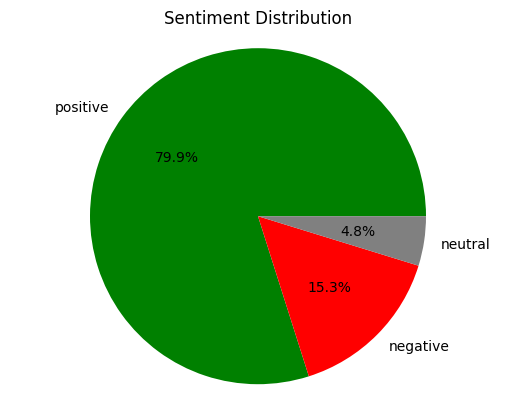

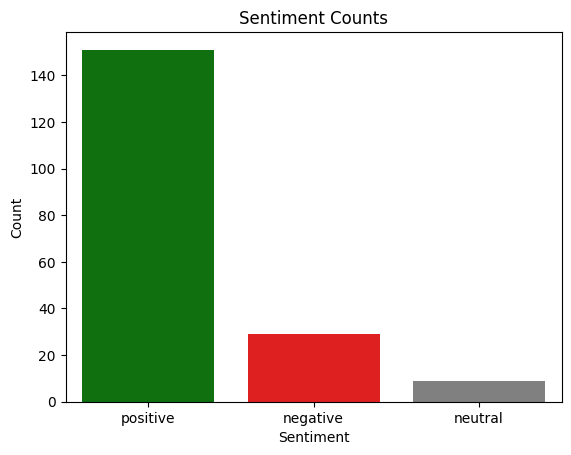

In [22]:
visualize_sentiment(sentiment_result)